<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-for-Finance-(2nd-ed.)" data-toc-modified-id="Python-for-Finance-(2nd-ed.)-1">Python for Finance (2nd ed.)</a></span></li><li><span><a href="#Trading-Strategies-(a)" data-toc-modified-id="Trading-Strategies-(a)-2">Trading Strategies (a)</a></span></li><li><span><a href="#Simple-Moving-Averages均线交易" data-toc-modified-id="Simple-Moving-Averages均线交易-3">Simple Moving Averages均线交易</a></span><ul class="toc-item"><li><span><a href="#Data-Import" data-toc-modified-id="Data-Import-3.1">Data Import</a></span></li><li><span><a href="#Trading-Strategy" data-toc-modified-id="Trading-Strategy-3.2">Trading Strategy</a></span></li><li><span><a href="#Vectorized-Backtesting回溯测试" data-toc-modified-id="Vectorized-Backtesting回溯测试-3.3">Vectorized Backtesting回溯测试</a></span></li><li><span><a href="#Optimization优化/最值化" data-toc-modified-id="Optimization优化/最值化-3.4">Optimization优化/最值化</a></span></li></ul></li><li><span><a href="#Random-Walk-Hypothesis" data-toc-modified-id="Random-Walk-Hypothesis-4">Random Walk Hypothesis</a></span></li></ul></div>

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Trading Strategies (a)

# Simple Moving Averages均线交易

## Data Import

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [3]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [4]:
raw = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)

In [5]:
raw = pd.read_csv('./source/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [7]:
raw['AAPL.O']

Date
2010-01-01           NaN
2010-01-04     30.572827
2010-01-05     30.625684
2010-01-06     30.138541
2010-01-07     30.082827
                 ...    
2018-06-25    182.170000
2018-06-26    184.430000
2018-06-27    184.160000
2018-06-28    185.500000
2018-06-29    185.110000
Name: AAPL.O, Length: 2216, dtype: float64

In [8]:
symbol = 'AAPL.O'

In [9]:
data = (pd.DataFrame(raw[symbol]).dropna())

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


## Trading Strategy

## rolling做简单均线，一个是252，是一年里面的交易日；一个是42，是两个月里面的交易日(252/6)。 所以一个是做两月的均线一个是做年均线。

In [11]:
SMA1 = 42  
SMA2 = 252  

In [12]:
data['SMA1'] = data[symbol].rolling(SMA1).mean()  
data['SMA2'] = data[symbol].rolling(SMA2).mean()  

## 在data的df文件后面加上一列，是rolling.mean

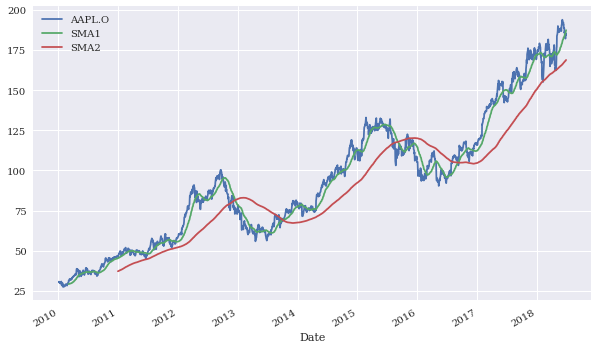

In [13]:
data.plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_plot_01.png')

In [14]:
data.head()

,AAPL.O,SMA1,SMA2
Date,,,
2010-01-04,30.572827,NaN,NaN
2010-01-05,30.625684,NaN,NaN
2010-01-06,30.138541,NaN,NaN
2010-01-07,30.082827,NaN,NaN
2010-01-08,30.282827,NaN,NaN


In [15]:
data.iloc[249:270]

,AAPL.O,SMA1,SMA2
Date,,,
2010-12-29,46.469954,45.141307,NaN
2010-12-30,46.237097,45.218450,NaN
2010-12-31,46.079954,45.280967,37.120735
2011-01-03,47.081381,45.349708,37.186246
2011-01-04,47.327096,45.412599,37.252521
2011-01-05,47.714238,45.466102,37.322266
2011-01-06,47.675667,45.522565,37.392079
2011-01-07,48.017095,45.582089,37.462453
2011-01-10,48.922094,45.671800,37.537478


In [16]:
data.dropna(inplace=True)

## 改进一下，将data结果里面的空值替换掉inplace=True，这样就是从2010-12-31开始，各项都有值在(因为rolling里面取值有252是一个年度的交易天数，所以意味着会出现一个251天的数值缺失，在第一个年末才可能算第一次252天的rolling)。从图中也可以看出红色线(代表252天的SAM2)在图上和原值线大概有一年的数据缺失。

## 盘整可以理解为：非趋势走势类型，一概统称为盘整走势类型，至于是本级别盘整还是扩展为大一级盘整，根据走势实际判断。所以在出现盘整的情况下，是不能通过均线来做多或者空，因为均线是用来做趋势变化的多空投资。而且在一个较为成熟的市场里面，大多数情况下都是盘整的情况。

In [17]:
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)  

In [18]:
data.tail()

,AAPL.O,SMA1,SMA2,Position
Date,,,,
2018-06-25,182.17,185.606190,168.265556,1
2018-06-26,184.43,186.087381,168.418770,1
2018-06-27,184.16,186.607381,168.579206,1
2018-06-28,185.50,187.089286,168.736627,1
2018-06-29,185.11,187.470476,168.901032,1


## 看两个长短期均线值的大小，短期高于长期就做多(黄金交叉1)，长期高于短期(死亡交叉-1)就做空。
## 通过均线来做技术分析好处是可以看出趋势，不会做反趋势的投资，但是坏处是会有layback滞后，所以会有用两个均线来做分析(两个都有layback), 要比用原值这种layback要好一些。

## 这里面使用的都是收盘价，但是实操中需要在收盘前预估当日的收盘价，所以可能存在误差，或者也可以用第二日的开盘价来做rolling均线。
## 技术分析就是通过平均来抵消股价的波动。

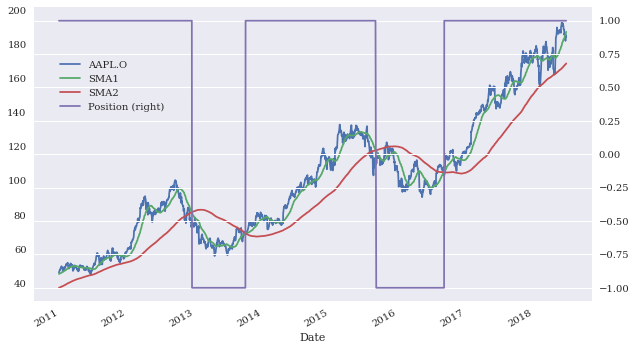

In [19]:
ax = data.plot(secondary_y='Position', figsize=(10, 6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_02.png')

## secondary_y='Position'是将position的值作为右边y轴的值，简单粗暴，做出两个y轴，然后data.plot会对data里面的所有index做图。
## get_legend().set_bbox_to_anchor将图例放在哪里。

In [20]:
data[data['Position'] == -1].head()

,AAPL.O,SMA1,SMA2,Position
Date,,,,
2012-12-18,76.271352,81.276020,81.537262,-1
2012-12-19,75.187068,80.873628,81.619626,-1
2012-12-20,74.532811,80.496384,81.698719,-1
2012-12-21,74.189926,80.188527,81.768662,-1
2012-12-24,74.309640,79.801242,81.838799,-1


## 2012-12-18当天还是赚多单的利润，但是在收盘前的一瞬间(理想状态)要转到空单(第二天可以赚到空单的报酬率)。

## Vectorized Backtesting回溯测试

In [21]:
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))  

In [22]:
data['Strategy'] = data['Position'].shift(1) * data['Returns']  

In [23]:
data.round(4).head()

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2010-12-31,46.0800,45.2810,37.1207,1,NaN,NaN
2011-01-03,47.0814,45.3497,37.1862,1,0.0215,0.0215
2011-01-04,47.3271,45.4126,37.2525,1,0.0052,0.0052
2011-01-05,47.7142,45.4661,37.3223,1,0.0081,0.0081
2011-01-06,47.6757,45.5226,37.3921,1,-0.0008,-0.0008


## Returns做的是可以连续加总的连续时间报酬率(相对的是简单报酬率，是不可加的)，需要通过log，.shift(1)是前一天的股价，log(当天/前一天).
## 'Strategy'相当于是给returns做-1和1的加权，作用类似于做绝对值，在股价下降的情况下同样可以通过做空来获利。

In [24]:
data[data['Position'] == -1].head()

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2012-12-18,76.271352,81.276020,81.537262,-1,0.028632,0.028632
2012-12-19,75.187068,80.873628,81.619626,-1,-0.014318,0.014318
2012-12-20,74.532811,80.496384,81.698719,-1,-0.008740,0.008740
2012-12-21,74.189926,80.188527,81.768662,-1,-0.004611,0.004611
2012-12-24,74.309640,79.801242,81.838799,-1,0.001612,-0.001612


## -0.001612这项问题可以看之前的在time series一节的更正，主要是因为时间问题。

In [25]:
data.dropna(inplace=True)

In [26]:
np.exp(data[['Returns', 'Strategy']].sum())  

Returns     4.017148
Strategy    5.811299
dtype: float64

## 4.017148是苹果股价翻了4倍，5.811299是通过做多空苹果股票可以获得当初苹果股票近6倍的收入。

In [27]:
data[['Returns', 'Strategy']].std() * 252 ** 0.5  

Returns     0.250571
Strategy    0.250407
dtype: float64

## data[['Returns', 'Strategy']].std()得出的是两个收益值的日波动率，而* 252 ** 0.5 可以获得年波动率(如果数据满足iid(独立且同为正态分布)下，意味着都是符合连续时间的布朗运动，都是随机的，意味着在更长的时间维度上看是同样的曲折波动，日波动率/mean值都可以直接加总为年波动率/mean值，因为std在计算中有开根号** 0.5 ，所以需要加根号)。
## 策略的收益比正常增长要高，但是波动率却差不多。

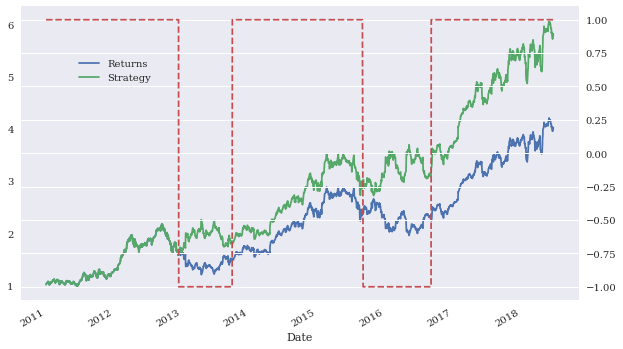

In [28]:
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_03.png');

## 画出权益(收益)图，.cumsum()累加值，.apply(np.exp)对之前的值取指数，将log还原为报酬率的形式，apply是对之前的数据做()里面的运算。
## 最开始在做多的时候两个的累加收益一致，但是到第一次策略做空的时候累加收益值拉开了，后面每出现一次做空的情况，累计收益值就拉开一次。

## Optimization优化/最值化

## 按过程看，先是通过均线rolling确定策略strategy(多空)，再通过策略做回溯测试(Vectorized Backtesting)得出策略改进后的returns, 最后还是要做约束条件下的Optimization优化/最值化得到最好的组合组合参数。(这会出现overfittng问题，因为用来回溯的数据是过去的数据，越能够获得高额的returns在回溯中，就很有可能在市场条件下运行新数据时表现远远低于之前测试时的成绩)
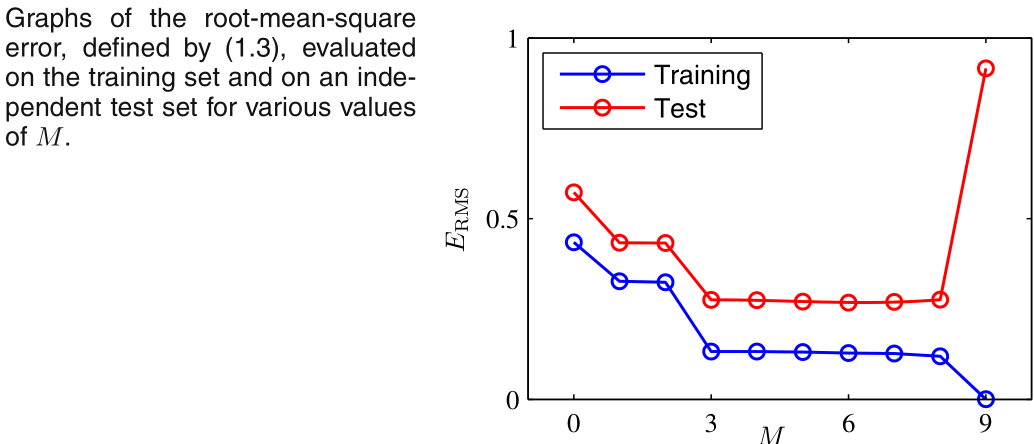

In [29]:
from itertools import product
import numpy as np

In [30]:
product?

## product is Cartesian product笛卡尔乘积/直积, 假设集合A={a, b}，集合B={0, 1, 2}，则两个集合的笛卡尔积为{(a, 0), (a, 1), (a, 2), (b, 0), (b, 1), (b, 2)}。简单说就是nested for-loops嵌套的循环函数。

In [31]:
sma1 = range(20, 61, 4)  
sma2 = range(180, 281, 10)  

## 总共有11 * 11种情况

In [32]:
for SMA1, SMA2 in product(sma1, sma2):
    print(SMA1, SMA2)

20 180
20 190
20 200
20 210
20 220
20 230
20 240
20 250
20 260
20 270
20 280
24 180
24 190
24 200
24 210
24 220
24 230
24 240
24 250
24 260
24 270
24 280
28 180
28 190
28 200
28 210
28 220
28 230
28 240
28 250
28 260
28 270
28 280
32 180
32 190
32 200
32 210
32 220
32 230
32 240
32 250
32 260
32 270
32 280
36 180
36 190
36 200
36 210
36 220
36 230
36 240
36 250
36 260
36 270
36 280
40 180
40 190
40 200
40 210
40 220
40 230
40 240
40 250
40 260
40 270
40 280
44 180
44 190
44 200
44 210
44 220
44 230
44 240
44 250
44 260
44 270
44 280
48 180
48 190
48 200
48 210
48 220
48 230
48 240
48 250
48 260
48 270
48 280
52 180
52 190
52 200
52 210
52 220
52 230
52 240
52 250
52 260
52 270
52 280
56 180
56 190
56 200
56 210
56 220
56 230
56 240
56 250
56 260
56 270
56 280
60 180
60 190
60 200
60 210
60 220
60 230
60 240
60 250
60 260
60 270
60 280


In [33]:
sz = np.array(product(sma1, sma2))
type(sz)

numpy.ndarray

In [34]:
import pandas as pd
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):  
    data = pd.DataFrame(raw[symbol])
    data.dropna(inplace=True)
    data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
    data['SMA1'] = data[symbol].rolling(SMA1).mean()
    data['SMA2'] = data[symbol].rolling(SMA2).mean()
    data.dropna(inplace=True)
    
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    l = data.size
    
    results = results.append(pd.DataFrame(
                {'SMA1': SMA1, 'SMA2': SMA2,
                 'MARKET': perf['Returns'],
                 'STRATEGY': perf['Strategy'],
                 'OUT': perf['Strategy'] - perf['Returns'],
                 'mean': (perf['Strategy'] - perf['Returns'])/l},
                   index=[0]), ignore_index=True)

In [35]:
data.size

11148

In [36]:
data

,AAPL.O,Returns,SMA1,SMA2,Position,Strategy
Date,,,,,,
2011-02-11,50.978520,0.006494,47.125054,38.362491,1,0.006494
2011-02-14,51.311377,0.006508,47.264768,38.436369,1,0.006508
2011-02-15,51.414234,0.002003,47.387316,38.512353,1,0.002003
2011-02-16,51.875662,0.008935,47.521601,38.590185,1,0.008935
2011-02-17,51.185663,-0.013390,47.628601,38.664838,1,-0.013390
...,...,...,...,...,...,...
2018-06-25,182.170000,-0.014983,181.169667,166.494607,1,-0.014983
2018-06-26,184.430000,0.012330,181.465500,166.598036,1,0.012330
2018-06-27,184.160000,-0.001465,181.728333,166.719143,1,-0.001465


## 上面的操作相当于是做了11 * 11(121)次strategy的过程，长短均线各有11条，这22条均线通过一长一短的方式组合起来产生了121个排列组合，每个组合都会出现大小差(均线出现死亡/黄金交叉的情况)，依据交叉情况产生出121个不同的多空策略。通过获得的策略回溯，将多空策略带入，得到最后的收益, 和对应rolling的returns(market)值做相减，获得的结果OUT就是通过策略获得的收益。
## 因为采用的均线rolling的值不同，如果rollingsteps设置为252，那么意味着有将近一年时间的值要作为NA被drop掉，因为是计算strategy和market的之间的额外利润大小，所以意味着，针对不同的rolling steps设置的值，会有个数不等的data要被drop掉。market值就是盈亏值的加总，按道理应该是121个组合只改变strategy，不改变market值，但是因为加总的时间长短不一样，所以market/returns的值也是不一样的。
## 虽然不同，但是通过计算OUT(returns和strategy的盈利差额)可以比较出通过均线交叉的技术分析所能够获得的最高收益值。
## 最后的结果是5 * 121的df表格，因为做了121次计算，每次就做出5个值写入df表格里面。
## 加入mean这一列，增加可比性，统一除以当前情况下的data的长度(因为rolling的空值被drop掉了，所以每一组的缺失值多少不一样)。
## index=[0]), ignore_index=True)是将第一行改为index的名称，同时将index隐去(不作为表格内的参数，参与计算/取值)。

In [37]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA1      121 non-null    int64  
 1   SMA2      121 non-null    int64  
 2   MARKET    121 non-null    float64
 3   STRATEGY  121 non-null    float64
 4   OUT       121 non-null    float64
 5   mean      121 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 5.8 KB


In [38]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT,mean
56,40,190,4.650342,7.175173,2.524831,0.000216
39,32,240,4.045619,6.558690,2.513071,0.000221
59,40,220,4.220272,6.544266,2.323994,0.000202
46,36,200,4.074753,6.389627,2.314874,0.000199
55,40,180,4.574979,6.857989,2.283010,0.000194
70,44,220,4.220272,6.469843,2.249571,0.000195
101,56,200,4.074753,6.319524,2.244772,0.000193


## .sort_values是类似于Excel里面的排列和筛选，ascending=False：默认是True就是从小往大排列，False是从大往小排。

In [39]:
results.sort_values('mean', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT,mean
39,32,240,4.045619,6.558690,2.513071,0.000221
56,40,190,4.650342,7.175173,2.524831,0.000216
59,40,220,4.220272,6.544266,2.323994,0.000202
46,36,200,4.074753,6.389627,2.314874,0.000199
70,44,220,4.220272,6.469843,2.249571,0.000195
55,40,180,4.574979,6.857989,2.283010,0.000194
101,56,200,4.074753,6.319524,2.244772,0.000193


## 看得出来，data的数量还是对结果产生了影响，按照OUT排列和按mean排列的前几位的排名不同。

# Random Walk Hypothesis

## 随机游走假说，股价是符合random walk的，是难以去预测的。下面就是将当天的股价和前一天/前2天/前3天/前4天/前5天股价做比较，得出前一天的股价是最相关的，简单推导了一下，Random Walk过程。

In [82]:
symbol = '.SPX'

In [104]:
data = pd.DataFrame(raw[symbol])

In [84]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)  
    data[col] = data[symbol].shift(lag)  
    cols.append(col)  

## col = 'lag_{}'.format(lag)，形成类似lag_1的index名称形式，data[col] =，在data的尾巴上续上col里面的index名称的列。

In [85]:
data.head(7)

,.SPX,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,1132.99,NaN,NaN,NaN,NaN,NaN
2010-01-05,1136.52,1132.99,NaN,NaN,NaN,NaN
2010-01-06,1137.14,1136.52,1132.99,NaN,NaN,NaN
2010-01-07,1141.69,1137.14,1136.52,1132.99,NaN,NaN
2010-01-08,1144.98,1141.69,1137.14,1136.52,1132.99,NaN
2010-01-11,1146.98,1144.98,1141.69,1137.14,1136.52,1132.99


In [86]:
data.head(20)

,.SPX,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,1132.99,NaN,NaN,NaN,NaN,NaN
2010-01-05,1136.52,1132.99,NaN,NaN,NaN,NaN
2010-01-06,1137.14,1136.52,1132.99,NaN,NaN,NaN
2010-01-07,1141.69,1137.14,1136.52,1132.99,NaN,NaN
2010-01-08,1144.98,1141.69,1137.14,1136.52,1132.99,NaN
2010-01-11,1146.98,1144.98,1141.69,1137.14,1136.52,1132.99
2010-01-12,1136.22,1146.98,1144.98,1141.69,1137.14,1136.52
2010-01-13,1145.68,1136.22,1146.98,1144.98,1141.69,1137.14


In [87]:
data.dropna(inplace=True)
data.head(20)

,.SPX,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-11,1146.98,1144.98,1141.69,1137.14,1136.52,1132.99
2010-01-12,1136.22,1146.98,1144.98,1141.69,1137.14,1136.52
2010-01-13,1145.68,1136.22,1146.98,1144.98,1141.69,1137.14
2010-01-14,1148.46,1145.68,1136.22,1146.98,1144.98,1141.69
2010-01-15,1136.03,1148.46,1145.68,1136.22,1146.98,1144.98
2010-01-26,1092.17,1096.78,1091.76,1116.48,1138.04,1150.23
2010-01-27,1097.50,1092.17,1096.78,1091.76,1116.48,1138.04
2010-01-28,1084.53,1097.50,1092.17,1096.78,1091.76,1116.48
2010-01-29,1073.87,1084.53,1097.50,1092.17,1096.78,1091.76


## 存在周期性的NA空值，因为SPX标普指数，基于美国股市(500支蓝筹)，所以是存在节日放假:除了周六日外休假的情况(周六日的休假已经在前面drop掉了)，这种情况下是没有.SPX值的，而log_1之类的是在基础.SPX数据的基础上做shift，所以这种NaN的情况就会递延到5次后(lag_5),  2010-01-18出现的NaN值，导致在lag_5上在2010-01-25(出现了双休日, 跳过了01-23，直接到了01-25)出现NaN值。
## 如果在这种情况下对结果进行dropna, 会造成大量数据的缺失(比如2010-01-18到2010-01-25期间有6天数据会被drop掉)，这是对有效数据的浪费。
## 改进方法就是在log之前drop掉data当中的NaN值，确保用来做log的data是标准的非空数据集。

In [105]:
data.dropna(inplace  = True)
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)  
    data[col] = data[symbol].shift(lag)  
    cols.append(col) 
data.dropna(inplace  = True)

In [106]:
data.head(20)

,.SPX,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-11,1146.98,1144.98,1141.69,1137.14,1136.52,1132.99
2010-01-12,1136.22,1146.98,1144.98,1141.69,1137.14,1136.52
2010-01-13,1145.68,1136.22,1146.98,1144.98,1141.69,1137.14
2010-01-14,1148.46,1145.68,1136.22,1146.98,1144.98,1141.69
2010-01-15,1136.03,1148.46,1145.68,1136.22,1146.98,1144.98
2010-01-19,1150.23,1136.03,1148.46,1145.68,1136.22,1146.98
2010-01-20,1138.04,1150.23,1136.03,1148.46,1145.68,1136.22
2010-01-21,1116.48,1138.04,1150.23,1136.03,1148.46,1145.68
2010-01-22,1091.76,1116.48,1138.04,1150.23,1136.03,1148.46


In [107]:
np.linalg.lstsq?

In [108]:
reg = np.linalg.lstsq(data[cols], data[symbol], rcond=-1)[0]

## np.linalg.lstsq是做最小平方法，输入(a, b), 解x的值，通过最小化|| b - a x ||的值。
## 做最小二乘法式，输入的a和b数组都必须是非空数据集(不能有NaN值)，不然会报错。
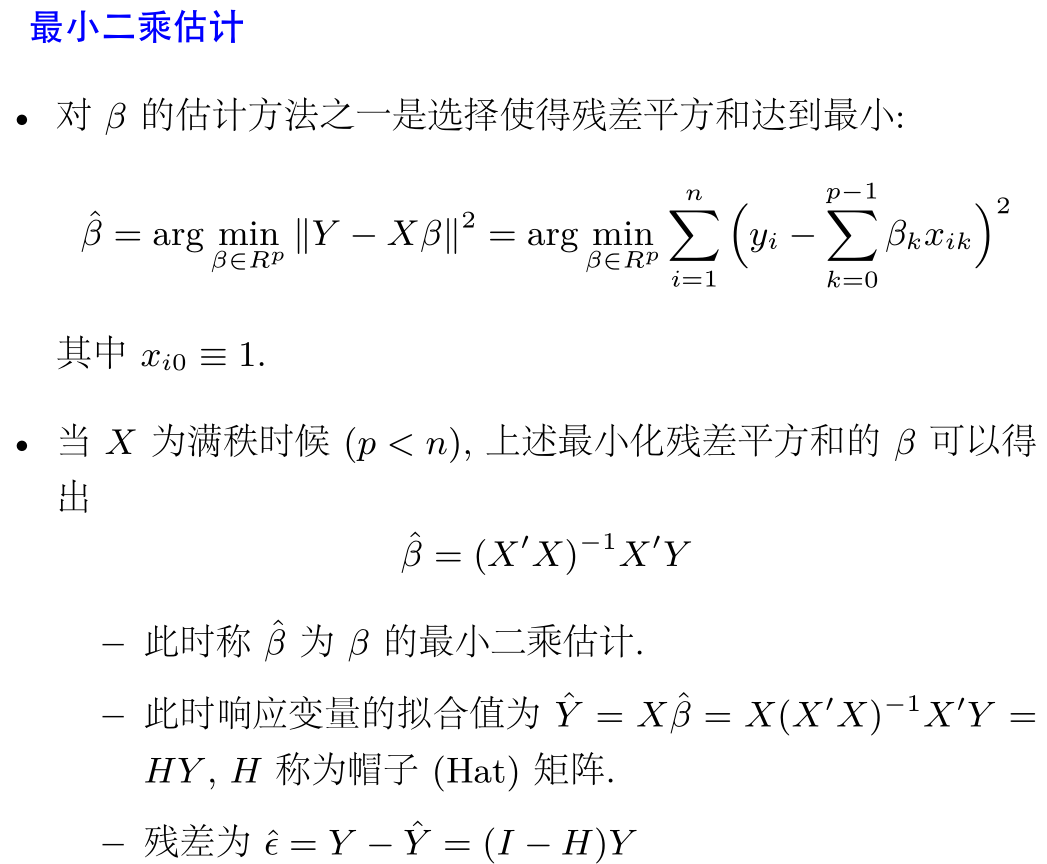
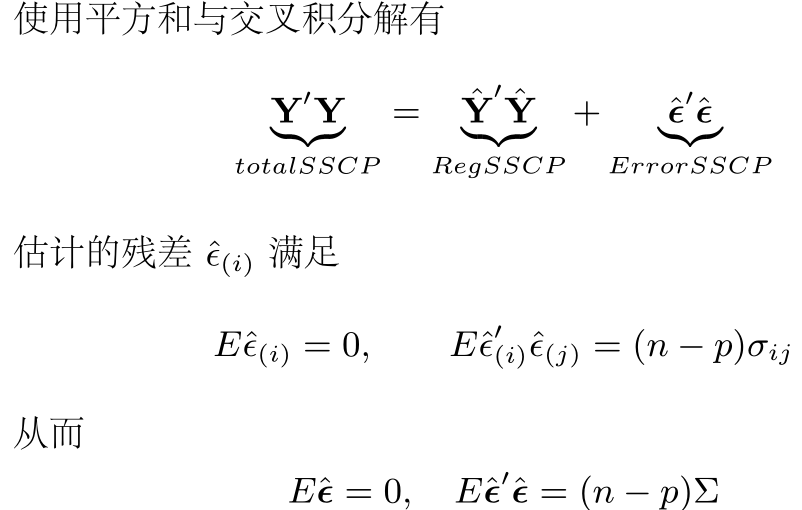
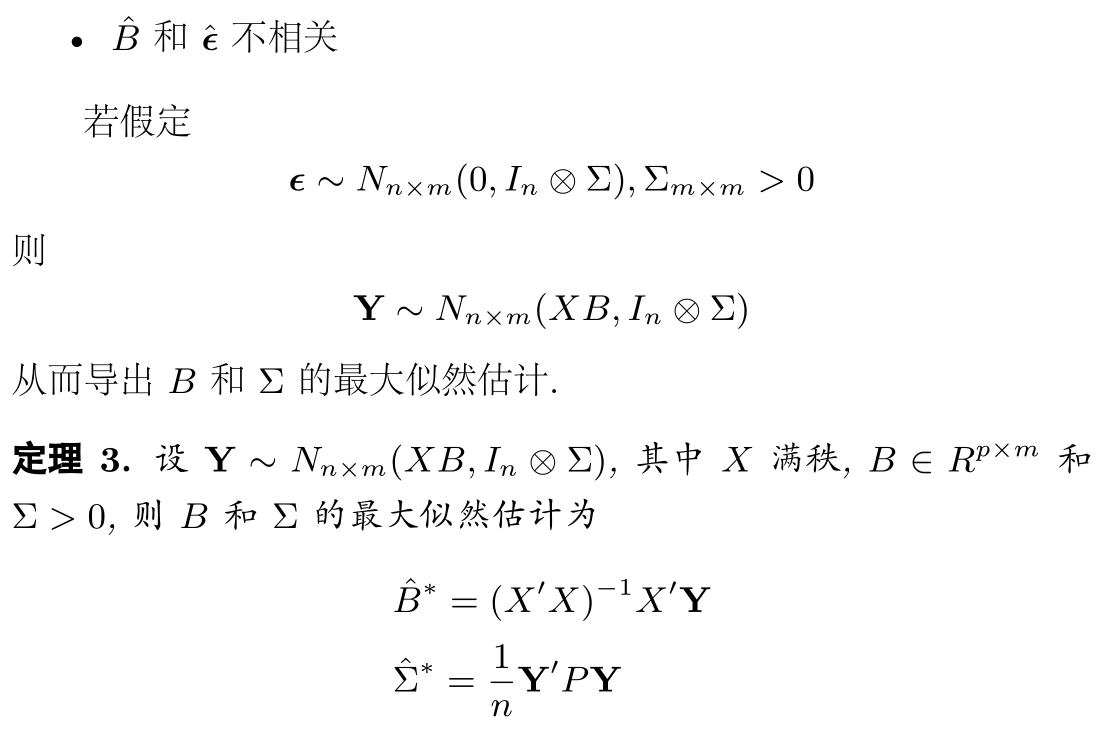

## rcond是设定出X的秩的个数，默认为-1，-1意味着满秩的情况， 则B^为 B 的最小二乘估计, 去除了ϵ (i)这个波动对结果都影响(假定前提).
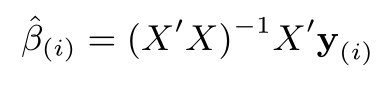

In [109]:
reg.round(3)

array([ 0.961,  0.009,  0.034, -0.017,  0.014])

## reg里面返回的是β的值Least-squares solution，5个数对应的是5个log_1到5的值与原始值之间进行最小二乘法得出的参数值。看得出来，参数最好的是log_1, 参数值靠近1，说明基本上做到了数据变化是大致相同的(对于股票市场来说也足够，因为买卖股票可以依靠前天提供的收益值来大致预估明天的涨跌情况(足够了))。
## 后面的4项都是在极小的数值，大致在0以上，无法通过这些数据来预测未来股价的涨跌。整个5项组成的多项式，主要影响结果的项还是log_1, 去掉后面的其他4个，不会对结果产生重大影响，但是去掉log_1就会对结果产生重大影响。

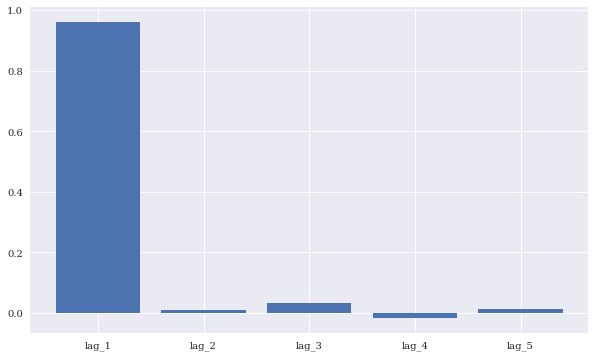

In [110]:
plt.figure(figsize=(10, 6))
plt.bar(cols, reg);
# plt.savefig('../../images/ch15/strat_plot_04.png');

## 差距巨大。

In [111]:
data['Prediction'] = np.dot(data[cols], reg)

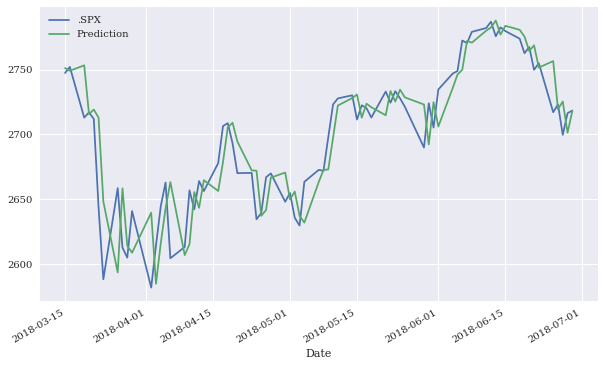

In [112]:
data[[symbol, 'Prediction']].iloc[-75:].plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_plot_05.png');

In [113]:
len(data)

2133

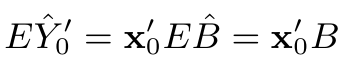
## 带入求出y^，y^就是预测的价值，一个1 * 5的向量和1750 * 5的矩阵相乘，通过dot函数。
## 下面的结果是.SPX本身的股价和通过函数预测出来的股价折线之间的对比，看得出来有shift1的痕迹，因为预测多项式中参数最大的是第1项log_1, 所以拟合出的股价曲线接近于log_1值对应值的曲线。
## .iloc[-75:]是两个数组都取出最后75列的结果作为对比的样板。

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>